# Extreme Gradient Boost


### Initialization

In [162]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

filename = "encoded_data_04_12.csv"
df = pd.read_csv(f"../DataSets/EncodedData/{filename}", sep=",", encoding="UTF-8")
df.head()

,name,height_in_cm,year,goals_for,goals_against,goals,assists,red_cards,yellow_cards,minutes_played,market_value_in_eur,age_at_evaluation,log_market_value_base10,country_of_citizenship_encoded,sub_position_encoded,club_id_encoded,domestic_competition_id_encoded
0,Miroslav Klose,184.0,2012.75,31.0,14.0,11.0,1.0,0.0,6.0,1483.0,4000000.0,35,6.60206,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
1,Miroslav Klose,184.0,2013.25,24.0,15.0,5.0,2.0,0.0,2.0,1102.0,2000000.0,35,6.30103,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
2,Miroslav Klose,184.0,2013.75,14.0,21.0,4.0,2.0,0.0,1.0,950.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
3,Miroslav Klose,184.0,2014.25,24.0,22.0,4.0,3.0,0.0,1.0,1270.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
4,Miroslav Klose,184.0,2014.75,31.0,18.0,4.0,3.0,0.0,2.0,496.0,1000000.0,37,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06


### Training and Prediction

In [163]:
X = df.drop(columns=['log_market_value_base10', 'name', 'market_value_in_eur'])
y = df['log_market_value_base10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = XGBRegressor(n_estimators=10000, max_depth=7, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [164]:

z = pd.merge(X_test, df, on=['height_in_cm','year','goals_for','goals_against','goals','assists','red_cards','yellow_cards','minutes_played','age_at_evaluation','country_of_citizenship_encoded','sub_position_encoded','club_id_encoded','domestic_competition_id_encoded'])
z.set_index(X_test.index, inplace=True)
z['Predicted_Value_log'] = y_pred
z['Predicted_Value'] = np.power(10, y_pred)

results = z[['name', 'year', 'market_value_in_eur', 'Predicted_Value', 'log_market_value_base10', 'Predicted_Value_log']]
results.sort_values(by='Predicted_Value', ascending=False)



,name,year,market_value_in_eur,Predicted_Value,log_market_value_base10,Predicted_Value_log
115380,Jude Bellingham,2023.75,180000000.0,3.216463e+08,8.255273,8.507379
56905,Raheem Sterling,2020.75,110000000.0,1.903778e+08,8.041393,8.279616
106186,Erling Haaland,2021.25,130000000.0,1.374200e+08,8.113943,8.138050
84975,Marcus Rashford,2023.25,80000000.0,1.340703e+08,7.903090,8.127333
34793,Neymar,2017.75,180000000.0,1.323553e+08,8.255273,8.121741
...,...,...,...,...,...,...
9660,Ruslan Adzhindzhal,2015.25,50000.0,3.718994e+04,4.698970,4.570426
117726,Konstantinos Nikolopoulos,2020.75,50000.0,3.254824e+04,4.698970,4.512527
30349,Adessoye Oyewole,2019.25,25000.0,2.992533e+04,4.397940,4.476039
76066,Jordan Roberts,2015.75,50000.0,2.474348e+04,4.698970,4.393461


In [165]:
carlo_holse_rows = results[results['name'] == 'Kylian Mbappé']

print(carlo_holse_rows)

                name     year  market_value_in_eur  Predicted_Value  \
97626  Kylian Mbappé  2018.25          150000000.0       30923642.0   

       log_market_value_base10  Predicted_Value_log  
97626                 8.176091             7.490291  


### Model Performance

In [166]:
# Reverse normalization for actual values
y_test_original = np.power(10, y_test)

# Reverse normalization for predicted values
y_pred_original = np.power(10, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Calculate the mean squared percentage error
percentage_error = (mse / y_test_original.mean()) * 100
print(f'Mean squared Percentage Error: {percentage_error}%')


from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(y_pred=y_pred_original, y_true=y_test_original)
print("Mean Absolute Percentage Error: ", result)

Mean Squared Error: 22793573651069.24
Mean squared Percentage Error: 484205426.97935784%
Mean Absolute Percentage Error:  0.49085550274615297


Lionel Messi
Mohamed Salah
Jude Bellingham
Raheem Sterling
Marcus Rashford
Neymar
Eden Hazard
Raheem Sterling
Romelu Lukaku
Erling Haaland
Harry Kane
Luis Suárez
Kylian Mbappé
Jadon Sancho
Antoine Griezmann


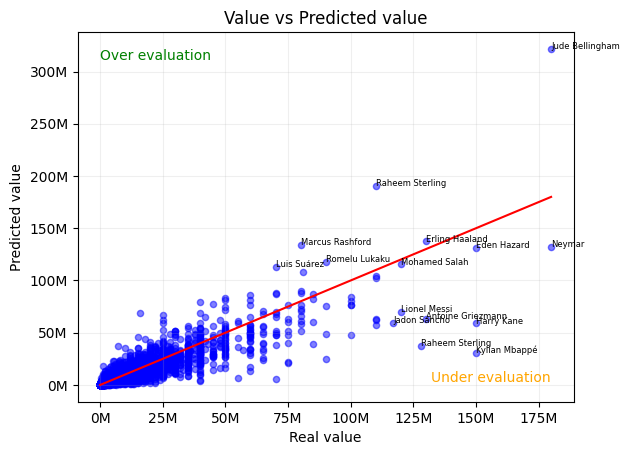

In [167]:
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
# Scatter plot
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red')
plt.text(min(y_test_original), max(y_pred_original), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Add player names for values over 50 million
for index, row in z.iterrows():
    if row['market_value_in_eur'] > 110000000 or row['Predicted_Value'] > 110000000:  # Assuming the value is in EUR
        print(row['name'])
        plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=6, color='black')

# Initialize lists for names and coordinates
#names = []
#coords = []

# Add player names for values over 100 million to the lists
#for index, row in z.iterrows():
#    if row['market_value_in_eur'] > 120000000:  # Assuming the value is in EUR
#        names.append(row['name'])
##        coords.append((row['market_value_in_eur'], row['Predicted_Value']))

# Annotate names as a text box with arrows
#for name, coord in zip(names, coords):
#    plt.annotate(name, xy=coord, xytext=(0, 0), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=6)

# Set formatter for x-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(alpha=0.2, zorder=1)
plt.show()


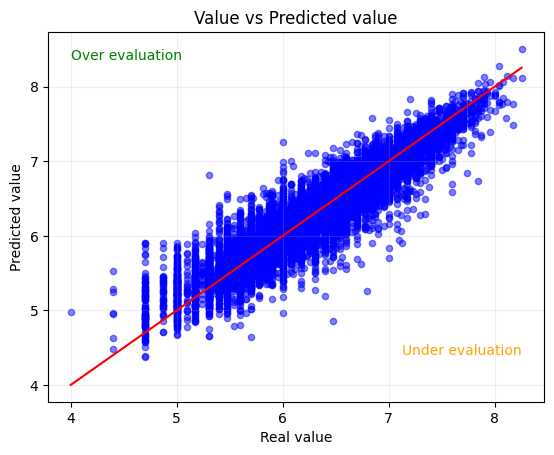

In [168]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.text(min(y_test), max(y_pred), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test), min(y_pred), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')
plt.grid(alpha=0.2, zorder=1)

plt.show()
